# Task 1 赛题理解
## 1. 赛题数据 和 数据标签

赛题以街道字符为为赛题数据，数据集报名后可见并可下载，该数据来自收集的SVHN街道字符，并进行了匿名采样处理。   
训练集数据包括3W张照片，验证集数据包括1W张照片，每张照片包括颜色图像和对应的编码类别和具体位置。  
  

对于训练数据每张图片将给出对于的编码标签，和具体的字符框的位置（训练集、测试集和验证集都给出字符位置），可用于模型训练：  
  
 Field  | Description|
--------- | --------|
top	| 左上角坐标X |
height	| 字符高度 |
left   | 左上角最表Y |
width  | 字符宽度 |
label  | 字符编码 |

## 2. 评测指标
用准确率来评价：  
**Score = 编码识别正确的数量 / 测试集图片数量**  
  
需要留意的是，对于一个图片而言，必须所有字符都正确才行，有任何一个字符错误，这么这张图片都视为识别错误。  
所以可以优先处理字符少的图片。




## 3. 读取数据

Populating the interactive namespace from numpy and matplotlib


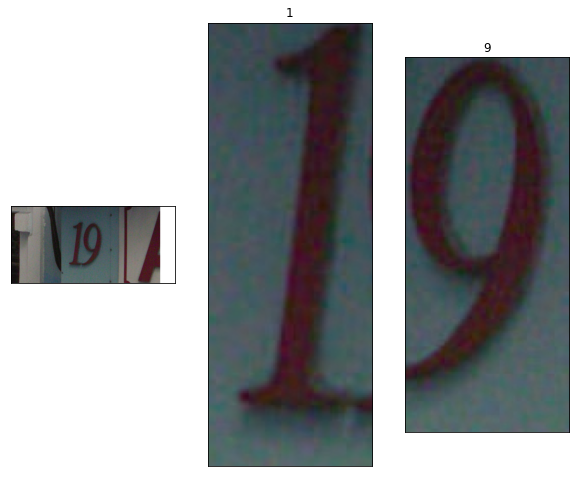

In [2]:
import json
import cv2
%pylab inline


train_json = json.load(open('./Data/mchar_train.json'))

# <div STYLE="page-break-after: always;"></div>
# 数据标注处理
def parse_json(d):
    arr = np.array([
    d['top'], d['height'], d['left'], d['width'], d['label']
    ])
    arr = arr.astype(int)
    return arr

img = cv2.imread('./Data/mchar_train/000000.png')
arr = parse_json(train_json['000000.png'])

plt.figure(figsize=(10, 10))
plt.subplot(1, arr.shape[1]+1, 1)
plt.imshow(img)
plt.xticks([]); plt.yticks([])

for idx in range(arr.shape[1]):
    plt.subplot(1, arr.shape[1]+1, idx+2)
    plt.imshow(img[arr[0, idx]:arr[0, idx]+arr[1, idx],arr[2, idx]:arr[2, idx]+arr[3, idx]])
    plt.title(arr[4, idx])
    plt.xticks([]); plt.yticks([])

## 4. 解题思路

a. 定长字符识别

b. 不定长字符识别

c. 检测再识别